In [1]:
import pickle
import pandas
import matplotlib.pyplot as plt

pandas.set_option('display.max_columns', None)

In [2]:
with open('../transformed_event_logs/PCR_start_end_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

/tmp/ipykernel_904733/3108252070.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  train_data = pickle.load(f)


In [3]:
train_data

,case:concept:name,id:id_start,cpee:activity_start,cpee:instance_start,lifecycle:transition_start,cpee:lifecycle:transition_start,cpee:state_start,time:timestamp_start,data_start,cpee:description_start,concept:name,concept:endpoint_start,cpee:activity_uuid_start,raw_start,start_timestamp_start,id:id_complete,cpee:activity_complete,cpee:instance_complete,lifecycle:transition_complete,cpee:lifecycle:transition_complete,cpee:state_complete,time:timestamp_complete,data_complete,cpee:description_complete,concept:endpoint_complete,cpee:activity_uuid_complete,raw_complete,start_timestamp_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Callback timeout,Export result,Export to EMS,Match patient data,Receive sample state,Send notification,Wait for plate validation,timeout
20701,10057,a2,a2,1887c54f-6403-420d-87ee-3cbc9ac6888a,start,activity/calling,0.0,2023-04-03 12:03:01.365,"{'value': None, 'children': [('', {'value': ''...",0.0,timeout,https://greschner.azurewebsites.net/backend/se...,a4363e956b26beefa5934a0743f2603d,0,2023-04-03 12:03:01.365000,a2,a2,1887c54f-6403-420d-87ee-3cbc9ac6888a,complete,activity/done,0.0,2023-04-03 15:13:51.655,0,0.0,https://greschner.azurewebsites.net/backend/se...,a4363e956b26beefa5934a0743f2603d,0,2023-04-03 15:13:51.655000,0 days 03:10:50.290000,11450.290,11450290.0,3.180636,43381,0,0,0,0,0,0,0,0,1
1968,10057,a6,a6,1887c54f-6403-420d-87ee-3cbc9ac6888a,start,activity/calling,0.0,2023-04-03 12:03:01.369,"{'value': None, 'children': [('', {'value': ''...",0.0,Wait for plate validation,https-get://cpee.org/ing/correlators/message/r...,0efe07e94078aa3e4e0b510eb820f15b,0,2023-04-03 12:03:01.369000,a6,a6,1887c54f-6403-420d-87ee-3cbc9ac6888a,complete,activity/done,0.0,2023-04-03 15:13:25.734,0,0.0,https-get://cpee.org/ing/correlators/message/r...,0efe07e94078aa3e4e0b510eb820f15b,0,2023-04-03 15:13:25.734000,0 days 03:10:24.365000,11424.365,11424365.0,3.173435,43381,0,0,0,0,0,0,0,1,1
10073,10057,a4,a4,1887c54f-6403-420d-87ee-3cbc9ac6888a,start,activity/calling,0.0,2023-04-03 12:03:01.374,"{'value': None, 'children': [('', {'value': ''...",0.0,Match patient data,https://greschner.azurewebsites.net/backend/corr,4ede2bca4546ffb8ce17a9c6122cceac,0,2023-04-03 12:03:01.374000,a4,a4,1887c54f-6403-420d-87ee-3cbc9ac6888a,complete,activity/done,0.0,2023-04-03 12:03:01.627,0,0.0,https://greschner.azurewebsites.net/backend/corr,4ede2bca4546ffb8ce17a9c6122cceac,0,2023-04-03 12:03:01.627000,0 days 00:00:00.253000,0.253,253.0,0.000070,43381,0,0,0,0,1,0,0,1,1
16789,10058,a2,a2,1d1323a9-97ea-4ca8-a70f-cc615c04f45f,start,activity/calling,0.0,2023-04-03 12:03:10.071,"{'value': None, 'children': [('', {'value': ''...",0.0,timeout,https://greschner.azurewebsites.net/backend/se...,84295f991249c05309358a7ad59d21a7,0,2023-04-03 12:03:10.071000,a2,a2,1d1323a9-97ea-4ca8-a70f-cc615c04f45f,complete,activity/done,0.0,2023-04-03 15:13:51.319,0,0.0,https://greschner.azurewebsites.net/backend/se...,84295f991249c05309358a7ad59d21a7,0,2023-04-03 15:13:51.319000,0 days 03:10:41.248000,11441.248,11441248.0,3.178124,43390,0,0,0,0,0,0,0,0,1
25840,10058,a6,a6,1d1323a9-97ea-4ca8-a70f-cc615c04f45f,start,activity/calling,0.0,2023-04-03 12:03:10.079,"{'value': None, 'children': [('', {'value': ''...",0.0,Wait for plate validation,https-get://cpee.org/ing/correlators/message/r...,ccbaf7edaf317cf2e80e3e0aaa4080d0,0,2023-04-03 12:03:10.079000,a6,a6,1d1323a9-97ea-4ca8-a70f-cc615c04f45f,complete,activity/done,0.0,2023-04-03 15:13:25.734,0,0.0,https-get://cpee.org/ing/correlators/message/r...,ccbaf7edaf317cf2e80e3e0aaa4080d0,0,2023-04-03 15:13:25.734000,0 days 03:10:15.655000,11415.655,11415655.0,3.171015,43390,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,18121,a5,a5,e8075204-b208-4666-b262-91a222abd9b2,start,activity/calling,0.0,2023-06-12 21:08:04.345,"{'value': None, 'c

In [11]:
gb = train_data.groupby('concept:name')
# Mean
mean_values = gb['duration_seconds'].mean()
print(mean_values)
# Standard Deviation
std_values = gb['duration_seconds'].std()
print(std_values)
# Minimum and Maximum
min_max_values = gb['duration_seconds'].agg(['min', 'max'])
print(min_max_values)
# Count
counts = gb['duration_seconds'].count()
print(counts)

concept:name
Callback timeout                 0.732669
Export result                 7159.092588
Export to EMS                 7366.551577
Match patient data             219.166045
Receive sample state           467.105489
Send notification                0.200270
Wait for plate validation    13142.414242
timeout                      18424.634759
Name: duration_seconds, dtype: float64
concept:name
Callback timeout                 2.290751
Export result                13740.766726
Export to EMS                15201.974369
Match patient data            4094.166593
Receive sample state          1356.950027
Send notification                0.045641
Wait for plate validation    16096.199368
timeout                      24330.849155
Name: duration_seconds, dtype: float64
                                min         max
concept:name                                   
Callback timeout              0.038      20.228
Export result                 0.333  140410.810
Export to EMS                 0.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27eb3121a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27eb312680>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27eb311ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27eb312bc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27eb312e60>],
 'means': []}

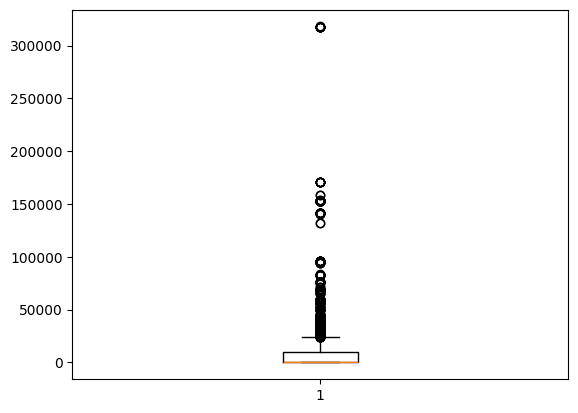

In [5]:
plt.boxplot(train_data['duration_seconds'])

In [6]:
over_10k = train_data[train_data['duration_seconds'] > 100000]

In [7]:
over_10k.groupby(['concept:name']).count()

,case:concept:name,id:id_start,cpee:activity_start,cpee:instance_start,lifecycle:transition_start,cpee:lifecycle:transition_start,cpee:state_start,time:timestamp_start,data_start,cpee:description_start,concept:endpoint_start,cpee:activity_uuid_start,raw_start,start_timestamp_start,id:id_complete,cpee:activity_complete,cpee:instance_complete,lifecycle:transition_complete,cpee:lifecycle:transition_complete,cpee:state_complete,time:timestamp_complete,data_complete,cpee:description_complete,concept:endpoint_complete,cpee:activity_uuid_complete,raw_complete,start_timestamp_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Callback timeout,Export result,Export to EMS,Match patient data,Receive sample state,Send notification,Wait for plate validation,timeout
concept:name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Export result,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Export to EMS,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Match patient data,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Wait for plate validation,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
timeout,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
